In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ParameterGrid, train_test_split
from sklearn.dummy import DummyClassifier

from tqdm import tqdm

import os
import datetime
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data/test.csv
data/gender_submission.csv
data/train.csv


# Load data, display train data

In [3]:
df_train = pd.read_csv("data/train.csv")
df_train, df_val = train_test_split(df_train, test_size=0.2, random_state=42)
df_test = pd.read_csv("data/test.csv")

display(df_train)
display(df_val)
display(df_test)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
331,332,0,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S
733,734,0,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S
382,383,0,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S
704,705,0,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.6500,NaN,S
270,271,0,1,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S
860,861,0,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,350026,14.1083,NaN,S
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0000,B96 B98,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
433,434,0,3,"Kallio, Mr. Nikolai Erland",male,17.0,0,0,STON/O 2. 3101274,7.1250,NaN,S
773,774,0,3,"Elias, Mr. Dibo",male,NaN,0,0,2674,7.2250,NaN,C
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
84,85,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Analyze train data

In [4]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          572 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        159 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [6]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            140
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          553
Embarked         2
dtype: int64

In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,572.000000,712.000000,712.000000,712.000000
mean,448.234551,0.376404,2.330056,29.498846,0.553371,0.379213,32.586276
std,256.731423,0.484824,0.824584,14.500059,1.176404,0.791669,51.969529
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.750000,0.000000,2.000000,21.000000,0.000000,0.000000,7.925000
50%,453.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,673.500000,1.000000,3.000000,38.000000,1.000000,0.000000,30.500000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Analyze Ticket number for usefulness

In [8]:
print(f"Unique Tickets: {len(df_train['Ticket'].unique())}")
print(f"Total guests: {len(df_train['Ticket'])}")

df_train[df_train.duplicated("Ticket")].sort_values("Ticket")

Unique Tickets: 558
Total guests: 712


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5000,B77,S
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5000,B79,S
262,263,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.6500,E67,S
329,330,1,1,"Hippach, Miss. Jean Gertrude",female,16.0,0,1,111361,57.9792,B18,C
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,E33,S
...,...,...,...,...,...,...,...,...,...,...,...,...
608,609,1,2,"Laroche, Mrs. Joseph (Juliette Marie Louise La...",female,22.0,1,2,SC/Paris 2123,41.5792,NaN,C
403,404,0,3,"Hakkarainen, Mr. Pekka Pietari",male,28.0,1,0,STON/O2. 3101279,15.8500,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.3750,NaN,S


In [9]:
df_train = df_train.drop(["Ticket"], axis=1)
df_val = df_val.drop(["Ticket"], axis=1)
df_test = df_test.drop(["Ticket"], axis=1)

display(df_train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
331,332,0,1,"Partner, Mr. Austen",male,45.5,0,0,28.5000,C124,S
733,734,0,2,"Berriman, Mr. William John",male,23.0,0,0,13.0000,NaN,S
382,383,0,3,"Tikkanen, Mr. Juho",male,32.0,0,0,7.9250,NaN,S
704,705,0,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,7.8542,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,31.2750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
106,107,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,7.6500,NaN,S
270,271,0,1,"Cairns, Mr. Alexander",male,NaN,0,0,31.0000,NaN,S
860,861,0,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,14.1083,NaN,S
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,120.0000,B96 B98,S


# Analyze Name for usefulness

In [10]:
df_train["Name"].str.split(',', expand=True)[0].sort_values()

279            Abbott
746            Abbott
874           Abelson
308           Abelson
365             Adahl
            ...      
559    de Messemaeker
282     de Pelsmaeker
361         del Carlo
153      van Billiard
868     van Melkebeke
Name: 0, Length: 712, dtype: object

In [11]:
print(f"Unique lastnames: {len(df_train['Name'].str.split(',', expand=True)[0].unique())}")

Unique lastnames: 552


In [12]:
df_train['lastname'] = df_train['Name'].str.split(',', expand=True)[0]
df_val['lastname'] = df_val['Name'].str.split(',', expand=True)[0]
df_test['lastname'] = df_test['Name'].str.split(',', expand=True)[0]

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,lastname
331,332,0,1,"Partner, Mr. Austen",male,45.5,0,0,28.5000,C124,S,Partner
733,734,0,2,"Berriman, Mr. William John",male,23.0,0,0,13.0000,NaN,S,Berriman
382,383,0,3,"Tikkanen, Mr. Juho",male,32.0,0,0,7.9250,NaN,S,Tikkanen
704,705,0,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,7.8542,NaN,S,Hansen
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,31.2750,NaN,S,Andersson


In [13]:
df_train = df_train.drop(["lastname", "Name"], axis=1)
df_val = df_val.drop(["lastname", "Name"], axis=1)
df_test = df_test.drop(["lastname", "Name"], axis=1)

display(df_train)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
331,332,0,1,male,45.5,0,0,28.5000,C124,S
733,734,0,2,male,23.0,0,0,13.0000,NaN,S
382,383,0,3,male,32.0,0,0,7.9250,NaN,S
704,705,0,3,male,26.0,1,0,7.8542,NaN,S
813,814,0,3,female,6.0,4,2,31.2750,NaN,S
...,...,...,...,...,...,...,...,...,...,...
106,107,1,3,female,21.0,0,0,7.6500,NaN,S
270,271,0,1,male,NaN,0,0,31.0000,NaN,S
860,861,0,3,male,41.0,2,0,14.1083,NaN,S
435,436,1,1,female,14.0,1,2,120.0000,B96 B98,S


# Analyze Age

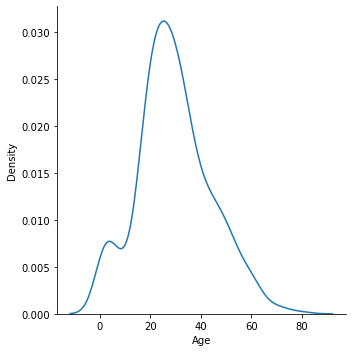

In [14]:
sns.displot(df_train, x="Age", kind="kde")

In [15]:
print(f"Mean {df_train['Age'].mean()}")
print(f"Median: {df_train['Age'].median()}")
print(f"Mode: {df_train['Age'].mode()[0]}")


Mean 29.498846153846156
Median: 28.0
Mode: 24.0


In [16]:
df_train = df_train.fillna({"Age": df_train["Age"].median()})
df_val = df_val.fillna({"Age": df_train["Age"].median()})
df_test = df_test.fillna({"Age": df_train["Age"].median()})

df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
331,332,0,1,male,45.5,0,0,28.5000,C124,S
733,734,0,2,male,23.0,0,0,13.0000,NaN,S
382,383,0,3,male,32.0,0,0,7.9250,NaN,S
704,705,0,3,male,26.0,1,0,7.8542,NaN,S
813,814,0,3,female,6.0,4,2,31.2750,NaN,S
...,...,...,...,...,...,...,...,...,...,...
106,107,1,3,female,21.0,0,0,7.6500,NaN,S
270,271,0,1,male,28.0,0,0,31.0000,NaN,S
860,861,0,3,male,41.0,2,0,14.1083,NaN,S
435,436,1,1,female,14.0,1,2,120.0000,B96 B98,S


# Discretize Age

# One Hot Categorical encoding for gender

In [17]:
df_train = df_train.join(pd.get_dummies(df_train["Sex"], prefix="sex"))
df_val = df_val.join(pd.get_dummies(df_val["Sex"], prefix="sex"))
df_test = df_test.join(pd.get_dummies(df_test["Sex"], prefix="sex"))

display(df_train.head(20))

df_train = df_train.drop(["Sex"], axis=1)
df_val = df_val.drop(["Sex"], axis=1)
df_test = df_test.drop(["Sex"], axis=1)

display(df_train)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,sex_female,sex_male
331,332,0,1,male,45.5,0,0,28.5000,C124,S,0,1
733,734,0,2,male,23.0,0,0,13.0000,NaN,S,0,1
382,383,0,3,male,32.0,0,0,7.9250,NaN,S,0,1
704,705,0,3,male,26.0,1,0,7.8542,NaN,S,0,1
813,814,0,3,female,6.0,4,2,31.2750,NaN,S,1,0
118,119,0,1,male,24.0,0,1,247.5208,B58 B60,C,0,1
536,537,0,1,male,45.0,0,0,26.5500,B38,S,0,1
361,362,0,2,male,29.0,1,0,27.7208,NaN,C,0,1
29,30,0,3,male,28.0,0,0,7.8958,NaN,S,0,1
55,56,1,1,male,28.0,0,0,35.5000,C52,S,0,1


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,sex_female,sex_male
331,332,0,1,45.5,0,0,28.5000,C124,S,0,1
733,734,0,2,23.0,0,0,13.0000,NaN,S,0,1
382,383,0,3,32.0,0,0,7.9250,NaN,S,0,1
704,705,0,3,26.0,1,0,7.8542,NaN,S,0,1
813,814,0,3,6.0,4,2,31.2750,NaN,S,1,0
...,...,...,...,...,...,...,...,...,...,...,...
106,107,1,3,21.0,0,0,7.6500,NaN,S,1,0
270,271,0,1,28.0,0,0,31.0000,NaN,S,0,1
860,861,0,3,41.0,2,0,14.1083,NaN,S,0,1
435,436,1,1,14.0,1,2,120.0000,B96 B98,S,1,0


# Check embarked feature

In [18]:
df_train.groupby("Embarked").count()["PassengerId"].reset_index().rename(columns={"PassengerId": "embark_count"})

,Embarked,embark_count
0,C,125
1,Q,60
2,S,525


In [19]:
df_train = df_train.fillna({"Embarked": "S"})
df_val = df_val.fillna({"Embarked": "S"})
df_test = df_test.fillna({"Embarked": "S"})

df_train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,sex_female,sex_male
331,332,0,1,45.5,0,0,28.5000,C124,S,0,1
733,734,0,2,23.0,0,0,13.0000,NaN,S,0,1
382,383,0,3,32.0,0,0,7.9250,NaN,S,0,1
704,705,0,3,26.0,1,0,7.8542,NaN,S,0,1
813,814,0,3,6.0,4,2,31.2750,NaN,S,1,0
...,...,...,...,...,...,...,...,...,...,...,...
106,107,1,3,21.0,0,0,7.6500,NaN,S,1,0
270,271,0,1,28.0,0,0,31.0000,NaN,S,0,1
860,861,0,3,41.0,2,0,14.1083,NaN,S,0,1
435,436,1,1,14.0,1,2,120.0000,B96 B98,S,1,0


In [20]:
# Quick check that train is not missing any embarks

print(f"Train embarks: {df_test['Embarked'].unique()}")
print(f"Val embarks: {df_val['Embarked'].unique()}")
print(f"Test embarks: {df_train['Embarked'].unique()}")

Train embarks: ['Q' 'S' 'C']
Val embarks: ['C' 'S' 'Q']
Test embarks: ['S' 'C' 'Q']


In [21]:
df_train = df_train.join(pd.get_dummies(df_train["Embarked"], prefix="embarked"))
df_val = df_val.join(pd.get_dummies(df_val["Embarked"], prefix="embarked"))
df_test = df_test.join(pd.get_dummies(df_test["Embarked"], prefix="embarked"))

display(df_train.head(20))

df_train = df_train.drop(["Embarked"], axis=1)
df_val = df_val.drop(["Embarked"], axis=1)
df_test = df_test.drop(["Embarked"], axis=1)

display(df_train)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
331,332,0,1,45.5,0,0,28.5000,C124,S,0,1,0,0,1
733,734,0,2,23.0,0,0,13.0000,NaN,S,0,1,0,0,1
382,383,0,3,32.0,0,0,7.9250,NaN,S,0,1,0,0,1
704,705,0,3,26.0,1,0,7.8542,NaN,S,0,1,0,0,1
813,814,0,3,6.0,4,2,31.2750,NaN,S,1,0,0,0,1
118,119,0,1,24.0,0,1,247.5208,B58 B60,C,0,1,1,0,0
536,537,0,1,45.0,0,0,26.5500,B38,S,0,1,0,0,1
361,362,0,2,29.0,1,0,27.7208,NaN,C,0,1,1,0,0
29,30,0,3,28.0,0,0,7.8958,NaN,S,0,1,0,0,1
55,56,1,1,28.0,0,0,35.5000,C52,S,0,1,0,0,1


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
331,332,0,1,45.5,0,0,28.5000,C124,0,1,0,0,1
733,734,0,2,23.0,0,0,13.0000,NaN,0,1,0,0,1
382,383,0,3,32.0,0,0,7.9250,NaN,0,1,0,0,1
704,705,0,3,26.0,1,0,7.8542,NaN,0,1,0,0,1
813,814,0,3,6.0,4,2,31.2750,NaN,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,1,3,21.0,0,0,7.6500,NaN,1,0,0,0,1
270,271,0,1,28.0,0,0,31.0000,NaN,0,1,0,0,1
860,861,0,3,41.0,2,0,14.1083,NaN,0,1,0,0,1
435,436,1,1,14.0,1,2,120.0000,B96 B98,1,0,0,0,1


# Check cabin data
-> Drop for now

In [22]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          553
sex_female       0
sex_male         0
embarked_C       0
embarked_Q       0
embarked_S       0
dtype: int64

In [23]:
df_train = df_train.drop(["Cabin"], axis=1)
df_val = df_val.drop(["Cabin"], axis=1)
df_test = df_test.drop(["Cabin"], axis=1)

# Final data check

In [24]:
display(df_train)
display(df_train.info())

display(df_val)
display(df_val.info())


display(df_test)
display(df_test.info())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
331,332,0,1,45.5,0,0,28.5000,0,1,0,0,1
733,734,0,2,23.0,0,0,13.0000,0,1,0,0,1
382,383,0,3,32.0,0,0,7.9250,0,1,0,0,1
704,705,0,3,26.0,1,0,7.8542,0,1,0,0,1
813,814,0,3,6.0,4,2,31.2750,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,1,3,21.0,0,0,7.6500,1,0,0,0,1
270,271,0,1,28.0,0,0,31.0000,0,1,0,0,1
860,861,0,3,41.0,2,0,14.1083,0,1,0,0,1
435,436,1,1,14.0,1,2,120.0000,1,0,0,0,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   sex_female   712 non-null    uint8  
 8   sex_male     712 non-null    uint8  
 9   embarked_C   712 non-null    uint8  
 10  embarked_Q   712 non-null    uint8  
 11  embarked_S   712 non-null    uint8  
dtypes: float64(2), int64(5), uint8(5)
memory usage: 64.1 KB


None

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
709,710,1,3,28.0,1,1,15.2458,0,1,1,0,0
439,440,0,2,31.0,0,0,10.5000,0,1,0,0,1
840,841,0,3,20.0,0,0,7.9250,0,1,0,0,1
720,721,1,2,6.0,0,1,33.0000,1,0,0,0,1
39,40,1,3,14.0,1,0,11.2417,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
433,434,0,3,17.0,0,0,7.1250,0,1,0,0,1
773,774,0,3,28.0,0,0,7.2250,0,1,1,0,0
25,26,1,3,38.0,1,5,31.3875,1,0,0,0,1
84,85,1,2,17.0,0,0,10.5000,1,0,0,0,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 709 to 10
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  179 non-null    int64  
 1   Survived     179 non-null    int64  
 2   Pclass       179 non-null    int64  
 3   Age          179 non-null    float64
 4   SibSp        179 non-null    int64  
 5   Parch        179 non-null    int64  
 6   Fare         179 non-null    float64
 7   sex_female   179 non-null    uint8  
 8   sex_male     179 non-null    uint8  
 9   embarked_C   179 non-null    uint8  
 10  embarked_Q   179 non-null    uint8  
 11  embarked_S   179 non-null    uint8  
dtypes: float64(2), int64(5), uint8(5)
memory usage: 16.1 KB


None

,PassengerId,Pclass,Age,SibSp,Parch,Fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,892,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,28.0,0,0,8.0500,0,1,0,0,1
414,1306,1,39.0,0,0,108.9000,1,0,1,0,0
415,1307,3,38.5,0,0,7.2500,0,1,0,0,1
416,1308,3,28.0,0,0,8.0500,0,1,0,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   sex_female   418 non-null    uint8  
 7   sex_male     418 non-null    uint8  
 8   embarked_C   418 non-null    uint8  
 9   embarked_Q   418 non-null    uint8  
 10  embarked_S   418 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 21.8 KB


None

One itemset doesn't have a fare specifified. So let's see how to fill.

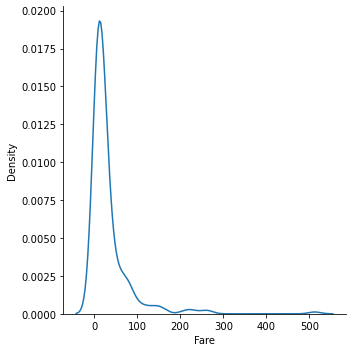

In [25]:
sns.displot(df_train, x="Fare", kind="kde")

In [26]:
print(f"Mean: {df_train['Fare'].mean()}")
print(f"Median: {df_train['Fare'].median()}")
print(f"Mode: {df_train['Fare'].mode()[0]}")

Mean: 32.586276123595475
Median: 14.4542
Mode: 8.05


In [27]:
df_test = df_test.fillna({"Fare": df_train["Fare"].median()}) # Fill up missing test Fare value with mode of train data

# Lets predict

In [28]:
x_train = df_train.drop(["PassengerId", "Survived"], axis=1)
y_train = df_train["Survived"].to_frame()

print("****************************** TRAIN DATA ***************************\n")
display(x_train)
display(y_train)


x_val = df_val.drop(["PassengerId", "Survived"], axis=1)
y_val = df_val["Survived"].to_frame()

print("\n\n****************************** VAL DATA ***************************\n")
display(x_val)
display(y_val)


x_test = df_test.drop(["PassengerId"], axis=1)
x_passenger_ids = df_test["PassengerId"].to_frame()

print("\n\n****************************** TEST DATA ***************************\n")
display(x_test)
display(x_passenger_ids)


****************************** TRAIN DATA ***************************



,Pclass,Age,SibSp,Parch,Fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
331,1,45.5,0,0,28.5000,0,1,0,0,1
733,2,23.0,0,0,13.0000,0,1,0,0,1
382,3,32.0,0,0,7.9250,0,1,0,0,1
704,3,26.0,1,0,7.8542,0,1,0,0,1
813,3,6.0,4,2,31.2750,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
106,3,21.0,0,0,7.6500,1,0,0,0,1
270,1,28.0,0,0,31.0000,0,1,0,0,1
860,3,41.0,2,0,14.1083,0,1,0,0,1
435,1,14.0,1,2,120.0000,1,0,0,0,1


,Survived
331,0
733,0
382,0
704,0
813,0
...,...
106,1
270,0
860,0
435,1




****************************** VAL DATA ***************************



,Pclass,Age,SibSp,Parch,Fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
709,3,28.0,1,1,15.2458,0,1,1,0,0
439,2,31.0,0,0,10.5000,0,1,0,0,1
840,3,20.0,0,0,7.9250,0,1,0,0,1
720,2,6.0,0,1,33.0000,1,0,0,0,1
39,3,14.0,1,0,11.2417,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
433,3,17.0,0,0,7.1250,0,1,0,0,1
773,3,28.0,0,0,7.2250,0,1,1,0,0
25,3,38.0,1,5,31.3875,1,0,0,0,1
84,2,17.0,0,0,10.5000,1,0,0,0,1


,Survived
709,1
439,0
840,0
720,1
39,1
...,...
433,0
773,0
25,1
84,1




****************************** TEST DATA ***************************



,Pclass,Age,SibSp,Parch,Fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,28.0,0,0,8.0500,0,1,0,0,1
414,1,39.0,0,0,108.9000,1,0,1,0,0
415,3,38.5,0,0,7.2500,0,1,0,0,1
416,3,28.0,0,0,8.0500,0,1,0,0,1


,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


# Preprocessing

In [29]:
scaler = preprocessing.StandardScaler().fit(x_train)

x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

In [30]:
dummy_classifier = DummyClassifier(strategy="most_frequent").fit(x_train, y_train)

print(f"Dummy Val Acc: {dummy_classifier.score(x_val, y_val)}")

Dummy Val Acc: 0.5865921787709497


# Random Forest

In [31]:
param_grid = {
    'max_depth': np.arange(2, 20, 2),
    'n_estimators': np.arange(10, 300, 10)
}

params = ParameterGrid(param_grid)

rfc_models = []

for param_set in tqdm(params):
    rfc = RandomForestClassifier(**param_set, random_state=42).fit(x_train, y_train.values.ravel())
    
    score = rfc.score(x_val, y_val.values.ravel())
    
    rfc_models.append({
        "model": rfc,
        "score": score
    })
    
rfc_models.sort(key=lambda x:x['score'], reverse=True)

print(f"1. RFC model: {rfc_models[0]}")
print(f"2. RFC model: {rfc_models[1]}")
print(f"3. RFC model: {rfc_models[2]}")

100%|██████████| 261/261 [03:00<00:00,  1.44it/s]

1. RFC model: {'model': RandomForestClassifier(max_depth=12, n_estimators=110, random_state=42), 'score': 0.8379888268156425}
2. RFC model: {'model': RandomForestClassifier(max_depth=8, n_estimators=30, random_state=42), 'score': 0.8324022346368715}
3. RFC model: {'model': RandomForestClassifier(max_depth=8, n_estimators=40, random_state=42), 'score': 0.8324022346368715}


# SVM

In [32]:
param_grid = {
    'C': [0.2, 0.5, 0.7, 1, 1.5, 1.8, 2],
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [0.5, 1, 2, 3, 5, 7],
    'gamma': ['scale', 'auto']
}

params = ParameterGrid(param_grid)

svc_models = []

for param_set in tqdm(params):
    svc = SVC(**param_set, random_state=42).fit(x_train, y_train.values.ravel())
    
    score = svc.score(x_val, y_val.values.ravel())
    
    svc_models.append({
        "model": svc,
        "score": score
    })
    
svc_models.sort(key=lambda x:x['score'], reverse=True)

print(f"1. SVC model: {svc_models[0]}")
print(f"2. SVC model: {svc_models[1]}")
print(f"3. SVC model: {svc_models[2]}")

100%|██████████| 252/252 [00:13<00:00, 18.57it/s]

1. SVC model: {'model': SVC(C=1, degree=0.5, random_state=42), 'score': 0.8212290502793296}
2. SVC model: {'model': SVC(C=1, degree=0.5, gamma='auto', random_state=42), 'score': 0.8212290502793296}
3. SVC model: {'model': SVC(C=1, degree=1, random_state=42), 'score': 0.8212290502793296}


In [33]:
models = rfc_models + svc_models

models.sort(key=lambda x:x['score'], reverse=True)
best_model = models[0]['model']

print(f"Best model: {models[0]}")


Best model: {'model': RandomForestClassifier(max_depth=12, n_estimators=110, random_state=42), 'score': 0.8379888268156425}


In [34]:
y_test_pred = best_model.predict(x_test)
x_passenger_ids["Survived"] = y_test_pred
display(x_passenger_ids)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [35]:
x_passenger_ids.to_csv(f"submission.csv", index=False)